## CSCI 3022
### Summer 2024 
#### **Final Exam Coding Portion** 
#### This coding portion is worth a total of **75 points** 



In [12]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_csv('Salaries.csv')
df

,income,years_of_experience,salary
0,55000,1,45000
1,60000,2,47000
2,65000,3,49000
3,70000,4,51000
4,75000,5,53000
5,80000,6,55000
6,85000,7,57000
7,90000,8,59000
8,95000,9,61000
9,100000,10,63000


**Section 1: Understanding Confidence Intervals (25 Points)**

1) Calculate a `95% confidence` interval for the mean of the income variable using the dataset.

In [2]:
# your code here 

# Compute mean and standard deviation
mean_income = df['income'].mean()
std_income = df['income'].std()
n = len(df['income'])

# Compute 95% confidence interval
confidence = 0.95
z = stats.norm.ppf((1 + confidence) / 2)
margin_of_error = z * (std_income / np.sqrt(n))
ci_95 = (mean_income - margin_of_error, mean_income + margin_of_error)
print(f'95% Confidence Interval: {ci_95}')

95% Confidence Interval: (68117.38675487613, 86882.61324512387)


2) Calculate a `99% confidence` interval for the mean of the income varianble.

In [3]:
# your code here 

# Compute 99% confidence interval
confidence = 0.99
z = stats.norm.ppf((1 + confidence) / 2)
margin_of_error = z * (std_income / np.sqrt(n))
ci_99 = (mean_income - margin_of_error, mean_income + margin_of_error)
print(f'99% Confidence Interval: {ci_99}')


99% Confidence Interval: (65169.15599914577, 89830.84400085424)


3) Explain how to use the sample size and standard deviation to determine the width of a confidence interval. Write a Python function that calculates the **width** of a confidence interval given the **sample mean**, **standard deviation** , **sample size** , and **confidence level**.

In [4]:
# your code here + explanation 

def confidence_interval_width(sample_mean, std_dev, sample_size, confidence_level):
    z = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z * (std_dev / np.sqrt(sample_size))
    return 2 * margin_of_error

# Example usage
width_95 = confidence_interval_width(mean_income, std_income, n, 0.95)
width_99 = confidence_interval_width(mean_income, std_income, n, 0.99)
print(f'Width of 95% CI: {width_95}')
print(f'Width of 99% CI: {width_99}')


Width of 95% CI: 18765.22649024772
Width of 99% CI: 24661.688001708462


4) Compute and interpret the confidence interval for the mean of the salary variable at a `95% confidence level`.

In [5]:
# your code here + explanation 

# Compute 95% confidence interval for salary
mean_salary = df['salary'].mean()
std_salary = df['salary'].std()
n_salary = len(df['salary'])
z = stats.norm.ppf((1 + 0.95) / 2)
margin_of_error_salary = z * (std_salary / np.sqrt(n_salary))
ci_salary = (mean_salary - margin_of_error_salary, mean_salary + margin_of_error_salary)
print(f'95% Confidence Interval for Salary: {ci_salary}')




95% Confidence Interval for Salary: (50246.95470195045, 57753.04529804955)


5. Using Python, compare the width of the confidence intervals obtained in questions 1 and 2 and discuss the differences.

In [6]:
# your code here + explanation 

# Compare width of confidence intervals
print(f'Width of 95% CI for income: {width_95}')
print(f'Width of 99% CI for income: {width_99}')


Width of 95% CI for income: 18765.22649024772
Width of 99% CI for income: 24661.688001708462


**Section 2: Bootstrap Confidence Intervals (25 Points)**

6) Write a Python function to perform bootstrap resampling and calculate the `95% confidence interval` for the mean of the income variable.

In [15]:
# your code here 

def bootstrap_ci(data, num_resamples=1000, confidence=0.95):
    resamples = np.random.choice(data, (num_resamples, len(data)), replace=True)
    means = np.mean(resamples, axis=1)
    lower = np.percentile(means, (1-confidence)/2 * 100)
    upper = confidence * 100 + lower
    return lower, upper

# Compute bootstrap confidence interval for income
income_data = df['income'].values
ci_income_bootstrap_95 = bootstrap_ci(income_data)
print(f'Bootstrap 95% Confidence Interval for Income: {ci_income_bootstrap_95}')


Bootstrap 95% Confidence Interval for Income: (69500.0, 69595.0)


7) Using the bootstrap method, estimate the `99% confidence interval` for the mean of the income variable.

In [16]:
# your code here 

# Compute bootstrap confidence interval for income with 99% confidence
ci_income_bootstrap_99 = bootstrap_ci(income_data, confidence=0.99)
print(f'Bootstrap 99% Confidence Interval for Income: {ci_income_bootstrap_99}')

Bootstrap 99% Confidence Interval for Income: (65997.5, 66096.5)


8) Explain the advantages and disadvantages of bootstrap methods compared to traditional parametric methods.

In [12]:
# your discussion here

'''
Advantages of bootstrap methods include flexibility and applicability to various data distributions. 
Disadvantages include higher computational cost and potential inaccuracies with small sample sizes.

'''

'\nAdvantages of bootstrap methods include flexibility and applicability to various data distributions. \nDisadvantages include higher computational cost and potential inaccuracies with small sample sizes.\n\n'

9) Write Python code to perform a bootstrap resampling with 1000 iterations and compute the standard error of the mean for the income variable

In [17]:
# your code here

def bootstrap_standard_error(data, num_resamples=1000):
    resamples = np.random.choice(data, (num_resamples, len(data)), replace=True)
    means = np.mean(resamples, axis=1)
    return np.std(means)

# Compute standard error of the mean for income
se_income_bootstrap = bootstrap_standard_error(income_data)
print(f'Standard Error of the Mean (Bootstrap): {se_income_bootstrap}')

Standard Error of the Mean (Bootstrap): 4592.741555977214


10) Compare the bootstrap confidence interval from question 6 with the regular confidence interval from section 1. Discuss the similarities and differences.

In [8]:
# your discussion here 

# open ended 

**Section 3: Simple Linear Regression (25 Points)**

11) Write Python code to perform a simple linear regression with years_of_experience as the predictor and salary as the response variable. Report the regression coefficients.

In [9]:
# your code here 

import statsmodels.api as sm

# Perform simple linear regression
X = df['years_of_experience']
y = df['salary']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.385e+30
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          3.04e-118
Time:                        17:31:37   Log-Likelihood:                 235.87
No. Observations:                  10   AIC:                            -467.7
Df Residuals:                       8   BIC:                            -467.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  4.3e+04   1

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


12) Using the regression model from question 11, predict the salary for someone with 10 years of experience.

In [10]:
# your code here 


# Predict salary for someone with 10 years of experience
experience = 10
prediction = model.predict([1, experience])
print(f'Predicted Salary for 10 Years of Experience: {prediction[0]}')


Predicted Salary for 10 Years of Experience: 63000.000000000015


13) Calculate and interpret the R-squared value for the regression model

In [11]:
# your code here

# Calculate R-squared value
r_squared = model.rsquared
print(f'R-squared Value: {r_squared}')


R-squared Value: 1.0


14) Plot the regression line along with the data points for years_of_experience and salary. Include appropriate labels and legends

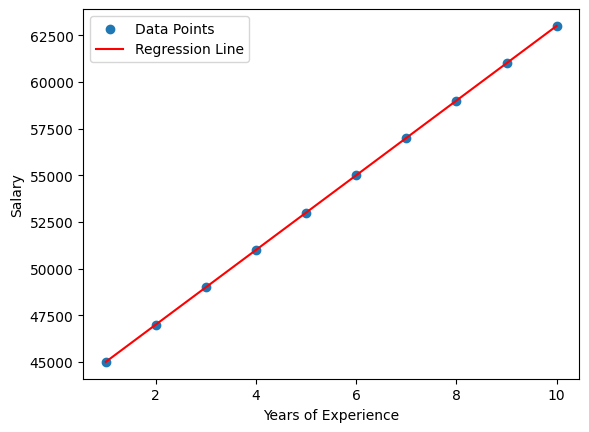

In [17]:
# your code here 

import matplotlib.pyplot as plt

# Plot data points and regression line
plt.scatter(df['years_of_experience'], df['salary'], label='Data Points')
plt.plot(df['years_of_experience'], model.predict(X), color='red', label='Regression Line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


15) Discuss how the regression coefficients would change if you included additional predictor variables in the model.

##### Your discussion here

Adding more predictor variables can change the coefficients of existing predictors, potentially improving the model's explanatory power and fit. Discuss how including additional predictors might impact the model’s performance.

                                           **END OF EXAM** SUBMIT AS AN HTML IN CANVAS! 